In [19]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('input/top50.csv', encoding='latin-1')
df.head()
df = df.drop('Unnamed: 0', axis=1)
df.columns = df.columns.str.replace('.','')

In [9]:
df.dtypes

TrackName         object
ArtistName        object
Genre             object
BeatsPerMinute     int64
Energy             int64
Danceability       int64
LoudnessdB         int64
Liveness           int64
Valence            int64
Length             int64
Acousticness       int64
Speechiness        int64
Popularity         int64
dtype: object

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtypes == 'int64']
num_features

['BeatsPerMinute',
 'Energy',
 'Danceability',
 'LoudnessdB',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [11]:
dfi = df[num_features]

Working inertia to determine how many clusters

<IPython.core.display.Javascript object>


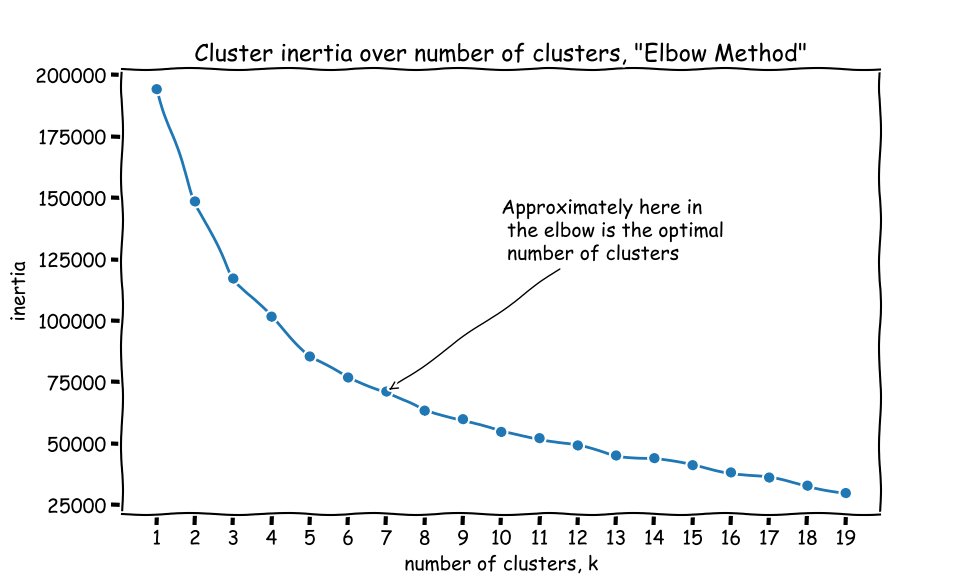

In [14]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    # Fit model to samples
    model.fit(dfi)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
with plt.xkcd():
    plt.plot(ks, inertias, '-o')
    plt.annotate(
    'Approximately here in\n the elbow is the optimal\n number of clusters',
    xy=(7, inertias[6]), arrowprops=dict(arrowstyle='->'), xytext=(10, 125000))

    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.title('Cluster inertia over number of clusters, "Elbow Method"')
    plt.show()

In [15]:
model = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
model.fit(dfi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
print(model.get_params)
print(model.labels_)

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>
[2 0 4 2 5 2 5 1 5 5 4 2 6 4 1 1 4 6 5 5 5 5 0 0 5 6 6 1 2 2 1 5 2 1 1 5 4
 3 3 6 1 2 1 5 6 2 4 2 1 2]


In [17]:
df['cluster'] = model.labels_
df.head()

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,cluster
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,2
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,0
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,4
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,2
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,5


<IPython.core.display.Javascript object>


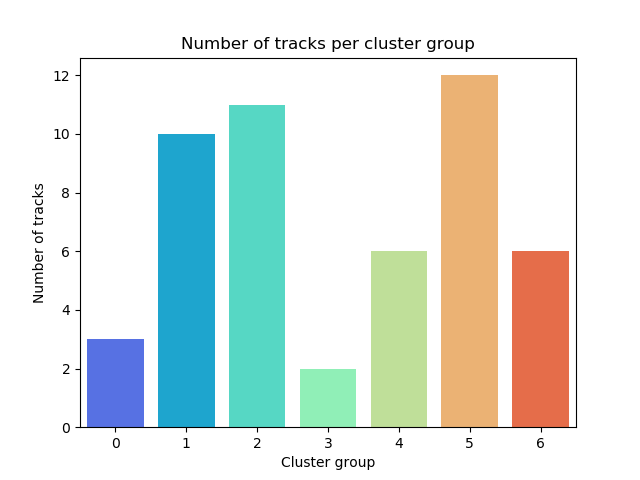

Text(0.5, 1.0, 'Number of tracks per cluster group')

In [22]:
_ = sns.countplot(df.cluster, palette='rainbow')
plt.ylabel('Number of tracks')
plt.xlabel('Cluster group')
plt.title('Number of tracks per cluster group')

Let's visualize the clusters by performing 2D scatter plotting of the numerical features.

In [26]:
print(dfi.columns)

Index(['BeatsPerMinute', 'Energy', 'Danceability', 'LoudnessdB', 'Liveness',
       'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')


<IPython.core.display.Javascript object>


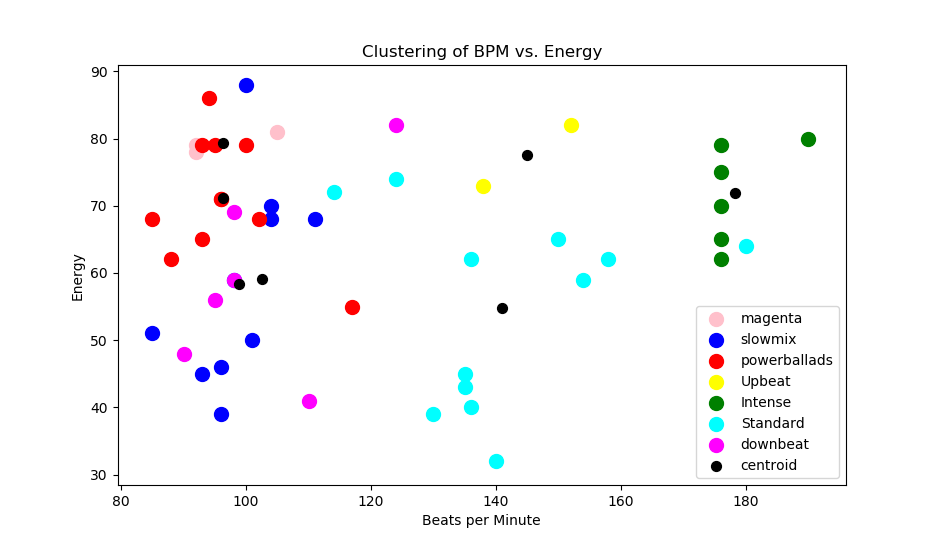

In [34]:
colors = ['pink', 'blue', 'red', 'yellow', 'green', 'cyan', 'magenta']
labels = ['magenta', 'slowmix', 'powerballads', 'Upbeat', 'Intense', 'Standard', 'downbeat']
for i in range(0,7):
    plt.scatter(df[df['cluster'] == i]['BeatsPerMinute'], df[df['cluster'] == i]['Energy'], s=100, c=colors[i], label=labels[i])

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s=50, c='black', label='centroid')
    
plt.title('Clustering of BPM vs. Energy')
plt.xlabel('Beats per Minute')
plt.ylabel('Energy')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


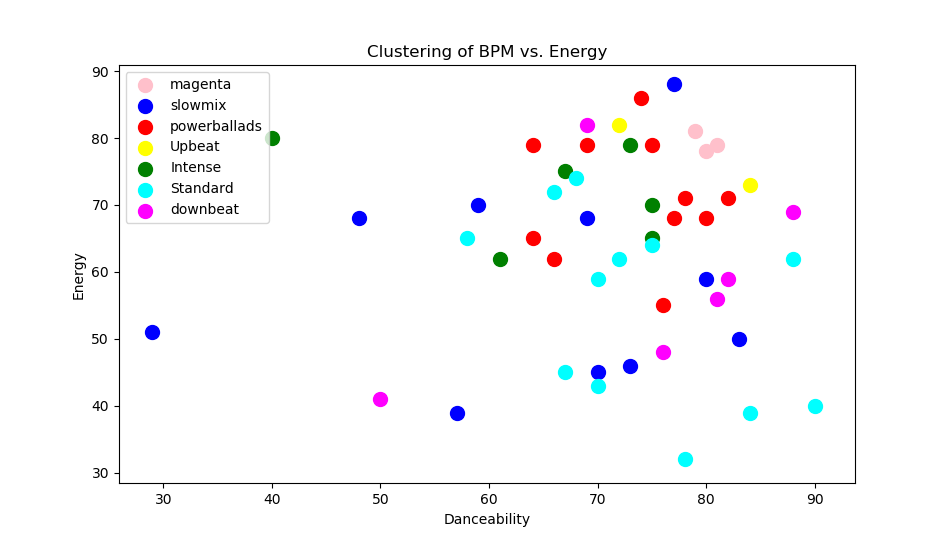

In [38]:
colors = ['pink', 'blue', 'red', 'yellow', 'green', 'cyan', 'magenta']
labels = ['magenta', 'slowmix', 'powerballads', 'Upbeat', 'Intense', 'Standard', 'downbeat']
for i in range(0,7):
    plt.scatter(df[df['cluster'] == i]['Danceability'], df[df['cluster'] == i]['Energy'], s=100, c=colors[i], label=labels[i])

    
plt.title('Clustering of BPM vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

3D Plot of the clusters

In [50]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [51]:
trace = go.Scatter3d(
    x = df['Popularity'],
    y = df['Danceability'],
    z = df['Energy'],
    mode='markers',
    marker=dict(
        color = df['cluster'],
        size=10,
        line=dict(
            color=df['cluster'],
            width=12
        ),
        opacity=.8
    )
)
plotdata = [trace]

layout = go.Layout(
    title='Popularity vs. Danceability vs. Energy',
    margin=dict(
    l=0,
    r=0,
    b=0,
    t=0
    ),
    scene=dict(
    xaxis=dict(title='Popularity'),
    yaxis=dict(title='Danceability'),
    zaxis=dict(title='Energy')
    )
)

fig = go.Figure(data=plotdata, layout=layout)
py.iplot(fig)

Plotting clusters with TSNE

<IPython.core.display.Javascript object>


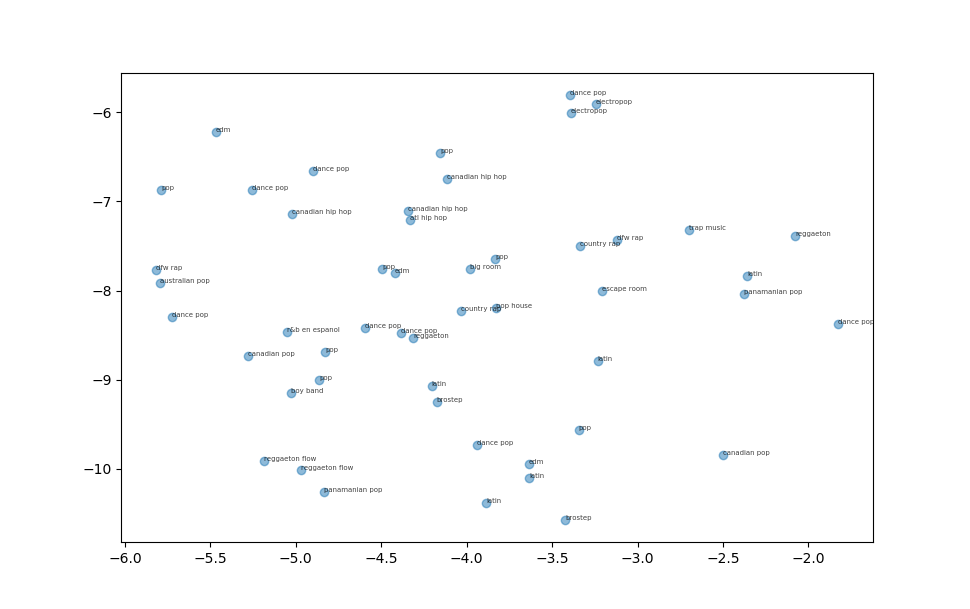

In [13]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Normalize the input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_dfi = scaler.fit_transform(dfi)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normal_dfi)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, genre in zip(xs, ys, df['Genre']):
    plt.annotate(genre, (x, y), fontsize=5, alpha=0.75)
plt.show()

# Linkage and dendograms

In [35]:
tf = df[['Danceability', 'Popularity', 'cluster']]
print(tf.head())

   Danceability  Popularity  cluster
0            76          79        2
1            79          92        0
2            40          85        4
3            64          86        2
4            58          94        5


<IPython.core.display.Javascript object>


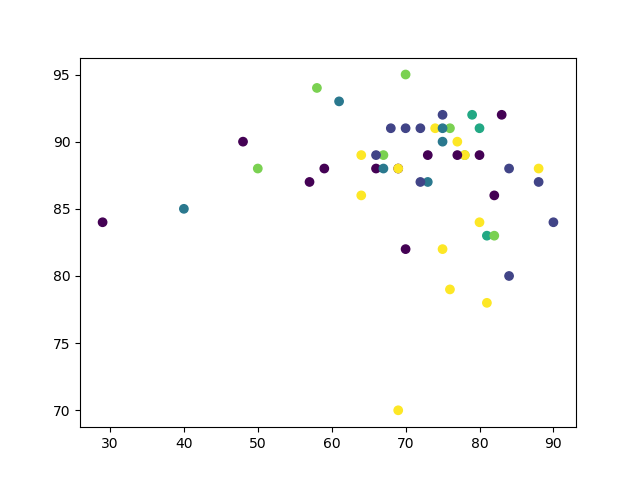

In [42]:
_ = plt.scatter(tf.Danceability, tf.Popularity, c=tf.cluster)
plt.show()

<IPython.core.display.Javascript object>


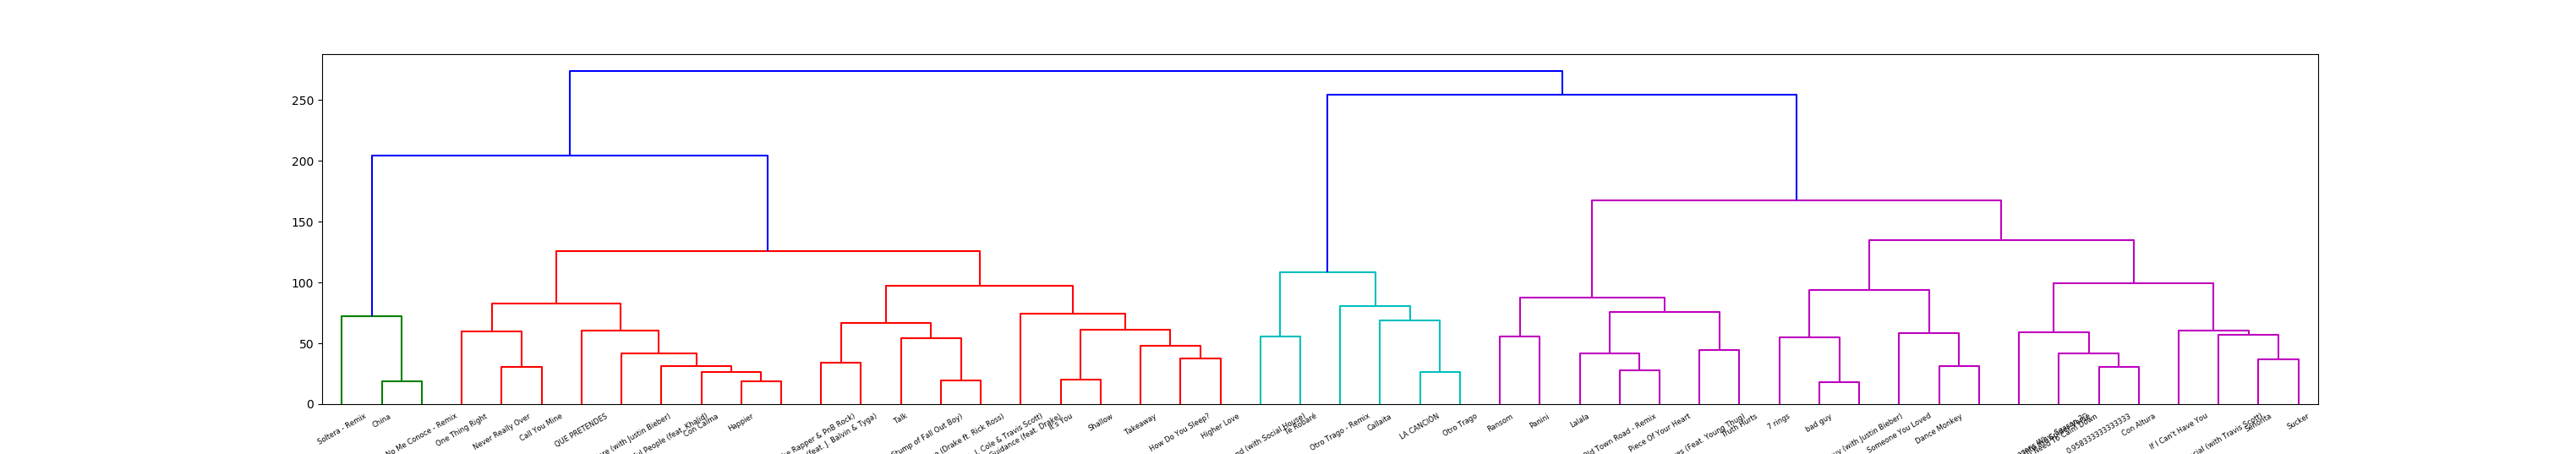

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(dfi, method='ward')

dendrogram(mergings, labels=df['Track.Name'].to_list(), leaf_rotation=30, leaf_font_size=6)
plt.show()


In [65]:
from scipy.cluster.hierarchy import fcluster

ct = pd.crosstab(df['Genre'], df['cluster'])

print(ct)

cluster           0  1  2  3  4  5
Genre                             
atl hip hop       1  0  0  0  0  0
australian pop    0  0  0  0  1  0
big room          0  1  0  0  0  0
boy band          0  1  0  0  0  0
brostep           1  0  0  0  0  1
canadian hip hop  2  1  0  0  0  0
canadian pop      0  0  0  0  0  2
country rap       0  2  0  0  0  0
dance pop         4  0  1  0  1  2
dfw rap           0  0  0  0  2  0
edm               3  0  0  0  0  0
electropop        0  0  0  0  2  0
escape room       0  1  0  0  0  0
latin             0  0  2  1  0  2
panamanian pop    0  0  2  0  0  0
pop               1  2  0  0  1  3
pop house         0  1  0  0  0  0
r&b en espanol    0  0  0  0  0  1
reggaeton         0  0  1  0  0  1
reggaeton flow    0  0  0  2  0  0
trap music        0  1  0  0  0  0


# Decompositioning

In [44]:
from sklearn import decomposition

By performing a PCA decomposition and plotting the explained variance ratio, we can see how many dimensions we can reduce the data to.

<IPython.core.display.Javascript object>


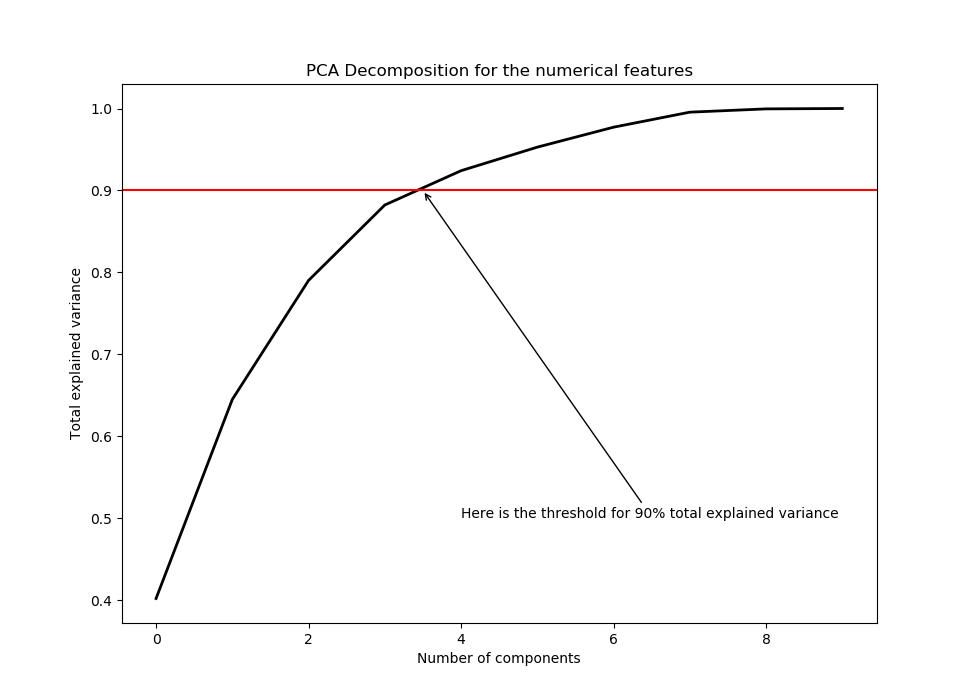

In [47]:
pca = decomposition.PCA().fit(dfi)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.title('PCA Decomposition for the numerical features')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.annotate('Here is the threshold for 90% total explained variance', 
             xy=(3.5, 0.9), arrowprops=dict(arrowstyle='->'), xytext=(4, 0.5))

plt.show()